### Lecture material for Week 2


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas,numpy
import sys,os,pickle
import itertools 
import random

sys.path.append('/Users/poldrack/Dropbox/code/brain-networks-course/utils')
from utils import get_joint_pubs,mk_random_graph

%matplotlib inline

In [80]:
researchers={'RP':{'name':'Russ Poldrack'},
            'AW':{'name':'Anthony Wagner'},
            'RB':{'name':'Randy Buckner'},
            'MR':{'name':'Marcus Raichle'},
            'OS':{'name':'Olaf Sporns'}}

G=nx.Graph()
G.add_nodes_from(researchers.keys())

In [81]:
G.nodes

NodeView(('RP', 'AW', 'RB', 'MR', 'OS'))

In [82]:
if os.path.exists('example_pubdata.pkl'):
    numpubs=pickle.load(open('example_pubdata.pkl','rb'))
else:
    numpubs={}

# first get pubmed search terms from names
for i in researchers:
    n_s=researchers[i]['name'].lower().split(' ')
    researchers[i]['pubmed_name']=n_s[1]+'-'+n_s[0][0]

numpubs={}
email='bill@gmail.com'  # email address for use by Entrez
for i in itertools.combinations(list(researchers.keys()),2):
    if not i in numpubs:
        # use cached data if present
        
        tmp = get_joint_pubs((researchers[i[0]]['pubmed_name'],
                                   researchers[i[1]]['pubmed_name']),
                                   email)

        numpubs[i]=tmp
# save pub data
pickle.dump(numpubs,open('example_pubdata.pkl','wb'))


In [83]:
numpubs

{('RP', 'AW'): 7,
 ('RP', 'RB'): 0,
 ('RP', 'MR'): 2,
 ('RP', 'OS'): 1,
 ('AW', 'RB'): 6,
 ('AW', 'MR'): 2,
 ('AW', 'OS'): 0,
 ('RB', 'MR'): 22,
 ('RB', 'OS'): 0,
 ('MR', 'OS'): 2}

In [84]:
for k in numpubs:
    if numpubs[k]>0:
        G.add_edge(k[0],k[1],weight=numpubs[k])

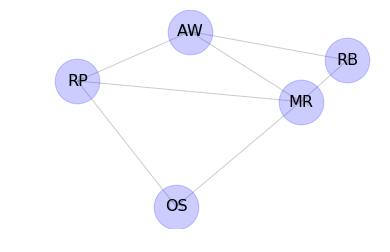

In [85]:
pos=nx.spring_layout(G)
_=nx.draw_networkx(G,pos=pos,node_color='blue',alpha=0.2,node_size=2000)
_=nx.draw_networkx_labels(G,pos=pos,font_size=16)
_=plt.axis('off')
plt.savefig('authorship.jpg')

In [86]:
for i in researchers:
    print(i,':',researchers[i]['name'])

RP : Russ Poldrack
AW : Anthony Wagner
RB : Randy Buckner
MR : Marcus Raichle
OS : Olaf Sporns


In [87]:
A = nx.to_numpy_array(G,weight='weight')
A=pandas.DataFrame(A,columns=list(G.nodes),index=list(G.nodes))
A

,RP,AW,RB,MR,OS
RP,0.0,7.0,0.0,2.0,1.0
AW,7.0,0.0,6.0,2.0,0.0
RB,0.0,6.0,0.0,22.0,0.0
MR,2.0,2.0,22.0,0.0,2.0
OS,1.0,0.0,0.0,2.0,0.0


In [88]:
# create binarized version

A_bin = (A.values>0).astype('int')
A_bin = pandas.DataFrame(A_bin,columns=list(G.nodes),index=list(G.nodes))
A_bin

,RP,AW,RB,MR,OS
RP,0,1,0,1,1
AW,1,0,1,1,0
RB,0,1,0,1,0
MR,1,1,1,0,1
OS,1,0,0,1,0


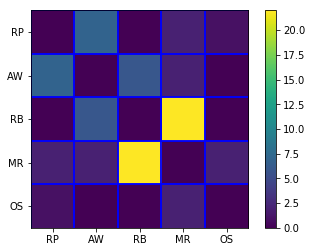

In [89]:
def plot_adjmtx(G,bin=True,outfile=None):
    A = nx.to_numpy_array(G,weight='weight')
    if bin:
        A = (A>0).astype('int')
        cmap='gray'
    else:
        cmap='viridis'
    A = pandas.DataFrame(A,columns=list(G.nodes),index=list(G.nodes))
    
    plt.imshow(A,cmap=cmap)
    if not bin:
        plt.colorbar()
    # set the axes to use name labels rather than numbers
    ax=plt.gca()
    researchers_list=list(G.nodes) 
    ax.set_yticks(numpy.arange(len(researchers_list)))
    ax.set_xticks(numpy.arange(len(researchers_list)))
    ax.set_xticklabels(researchers_list)
    ax.set_yticklabels(researchers_list)
    # add grid lines
    for i in range(len(researchers_list)):
        ax.axvline(x=i-0.5,color='b')
        ax.axhline(y=i-0.5,color='b')
    if outfile:
        plt.savefig(outfile)
        
plot_adjmtx(G,bin=True,outfile='adjmtx_bin.pdf')
plot_adjmtx(G,bin=False,outfile='adjmtx_weighted.pdf')

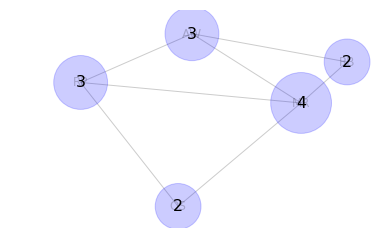

In [90]:
# graph by degree
node_sizes=[G.degree[i]*800 + 500 for i in G.nodes]
_=nx.draw_networkx(G,pos=pos,node_color='blue',alpha=0.2,node_size=node_sizes)
_=nx.draw_networkx_labels(G,pos=pos,font_size=16,labels=dict(G.degree))
_=plt.axis('off')
plt.savefig('authorship_degreecent.jpg')

In [91]:
G.degree

DegreeView({'RP': 3, 'AW': 3, 'RB': 2, 'MR': 4, 'OS': 2})

In [92]:
A_bin['degree'] = A_bin.sum(0)
A_bin

,RP,AW,RB,MR,OS,degree
RP,0,1,0,1,1,3
AW,1,0,1,1,0,3
RB,0,1,0,1,0,2
MR,1,1,1,0,1,4
OS,1,0,0,1,0,2


In [93]:
A

,RP,AW,RB,MR,OS
RP,0.0,7.0,0.0,2.0,1.0
AW,7.0,0.0,6.0,2.0,0.0
RB,0.0,6.0,0.0,22.0,0.0
MR,2.0,2.0,22.0,0.0,2.0
OS,1.0,0.0,0.0,2.0,0.0


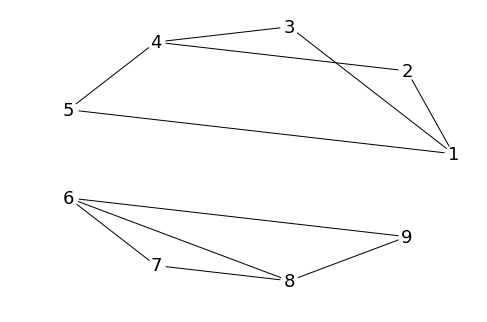

In [204]:
# components

G_2comp=nx.Graph()
G_2comp.add_edges_from([(1,2),(1,3),(2,4),(1,5),(3,4),(4,5),
                        (6,7),(6,8),(6,9),(8,9),(7,8)])
nx.draw_circular(G_2comp,with_labels=True,node_color='white',font_size=18)
plt.savefig('2components.pdf')



In [202]:
comp=nx.connected_component_subgraphs(G_2comp)
for i,c in enumerate(comp):
    print(i,c.nodes)

0 [1, 2, 3, 4, 5]
1 [8, 9, 6, 7]


NetworkXError: Node 0 has no position.

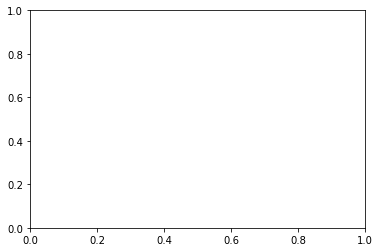

In [190]:
betcent=nx.betweenness_centrality(G)
node_sizes=[betcent[i]*4000 + 1000 for i in G.nodes]
betcent_txt={}
for i in betcent:
    betcent_txt[i]='%0.3f'%betcent[i]
_=nx.draw_networkx(G,pos=pos,node_color='blue',alpha=0.2,node_size=node_sizes)
_=nx.draw_networkx_labels(G,pos=pos,font_size=16,labels=betcent_txt)
_=plt.axis('off')
plt.savefig('authorship_betcent.jpg')

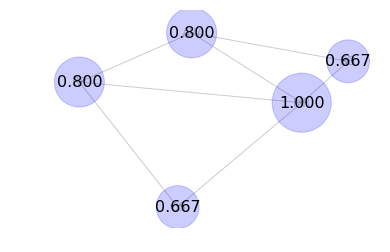

In [95]:
closecent=nx.closeness_centrality(G)
node_sizes=[(closecent[i] - 0.3)*5000 for i in G.nodes]
closecent_txt={}
for i in closecent:
    closecent_txt[i]='%0.3f'%closecent[i]
_=nx.draw_networkx(G,pos=pos,node_color='blue',alpha=0.2,node_size=node_sizes)
_=nx.draw_networkx_labels(G,pos=pos,font_size=16,labels=closecent_txt)
_=plt.axis('off')
plt.savefig('authorship_closecent.jpg')

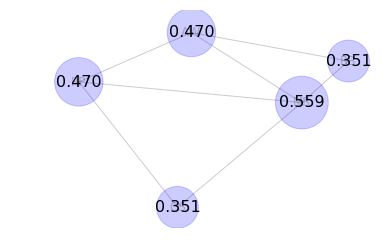

In [97]:
### Eigenvector centrality

eigcent=nx.eigenvector_centrality(G)
node_sizes=[(eigcent[i])*5000 for i in G.nodes]
eigcent_txt={}
for i in eigcent:
    eigcent_txt[i]='%0.3f'%eigcent[i]
_=nx.draw_networkx(G,pos=pos,node_color='blue',alpha=0.2,node_size=node_sizes)
_=nx.draw_networkx_labels(G,pos=pos,font_size=16,labels=eigcent_txt)
_=plt.axis('off')
plt.savefig('authorship_eigcent.jpg')

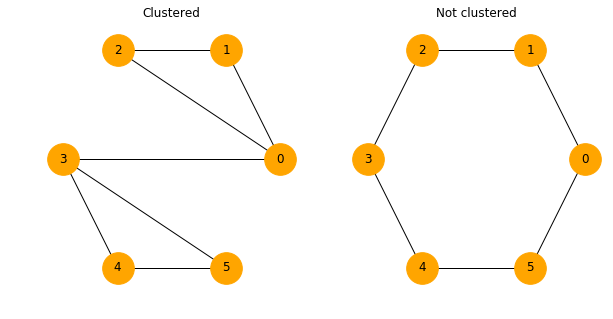

In [127]:
### Clustering

nodes = [i for i in range(6)]
G_clust=nx.Graph()
G_clust.add_nodes_from(nodes)
edges_clust=[(0,1),(0,2),(1,2),(0,3),(3,4),(4,5),(3,5)]
G_clust.add_edges_from(edges_clust)
G_ring=nx.Graph()
G_ring.add_nodes_from(nodes)
edges_ring=[(i,i+1) for i in range(len(nodes)-1)]
edges_ring.append((0,len(nodes)-1))
G_ring.add_edges_from(edges_ring)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
nx.draw_circular(G_clust,with_labels=True,node_color='orange',ax=ax1,node_size=1000)
ax1.set_title('Clustered')
nx.draw_circular(G_ring,with_labels=True,node_color='orange',ax=ax2,node_size=1000)
ax2.set_title('Not clustered')

plt.savefig('clustering.pdf')

In [123]:
print(nx.clustering(G_clust))
print(nx.clustering(G_ring))


{0: 0.3333333333333333, 1: 1.0, 2: 1.0, 3: 0.3333333333333333, 4: 1.0, 5: 1.0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}


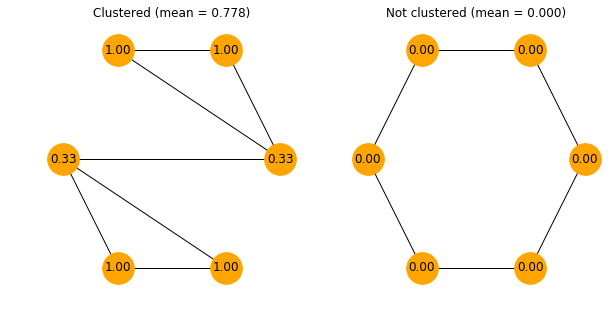

In [139]:
clustcoef_clust=nx.clustering(G_clust)
clustcoef_ring=nx.clustering(G_ring)

clustcoef_txt_clust={}
for i in clustcoef_clust:
    clustcoef_txt_clust[i]='%0.2f'%clustcoef_clust[i]
clustcoef_txt_ring={}
for i in clustcoef_ring:
    clustcoef_txt_ring[i]='%0.2f'%clustcoef_ring[i]
    
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))

nx.draw_circular(G_clust,with_labels=True,node_color='orange',ax=ax1,node_size=1000,
                labels=clustcoef_txt_clust)
ax1.set_title('Clustered (mean = %0.3f)'%nx.average_clustering(G_clust))
nx.draw_circular(G_ring,with_labels=True,node_color='orange',ax=ax2,node_size=1000,
                labels=clustcoef_txt_ring)
ax2.set_title('Not clustered (mean = %0.3f)'%nx.average_clustering(G_ring))


plt.savefig('clustering.pdf')

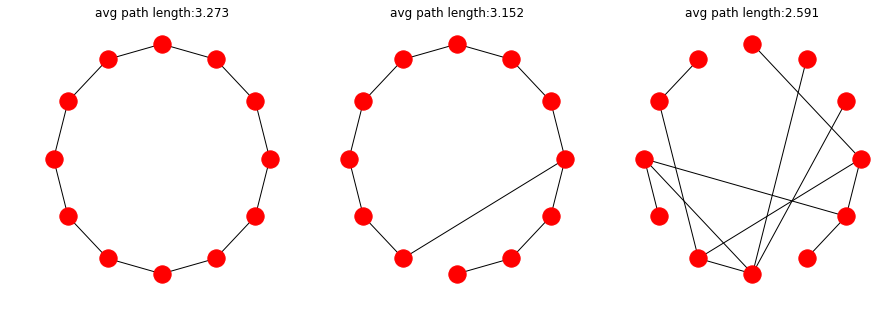

In [166]:
# Average path length

f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5))
nnodes=12
wsring=nx.watts_strogatz_graph(nnodes,2,0)
nx.draw_circular(wsring,ax=ax1)
ax1.set_title('avg path length:%0.3f'%nx.average_shortest_path_length(wsring))

wsrewire=nx.watts_strogatz_graph(nnodes,2,0.1,seed=1)
nx.draw_circular(wsrewire,ax=ax2)
ax2.set_title('avg path length:%0.3f'%nx.average_shortest_path_length(wsrewire))

wsrewire2=nx.watts_strogatz_graph(nnodes,2,0.5,seed=3)
nx.draw_circular(wsrewire2,ax=ax3)
ax3.set_title('avg path length:%0.3f'%nx.average_shortest_path_length(wsrewire2))

plt.savefig('apl_rewiring.pdf')

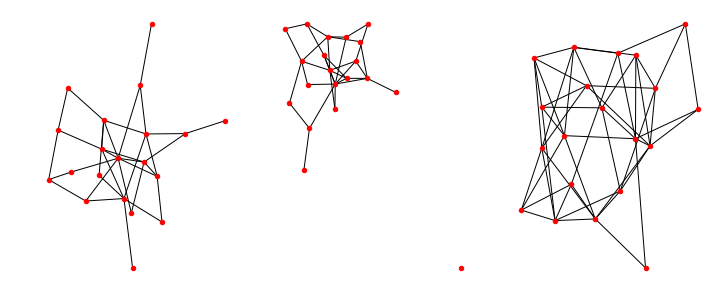

In [215]:
### Erdos-Renyi graphs

f,ax=plt.subplots(1,3,figsize=(12,5))
for i in range(len(ax)):
    G_er=nx.erdos_renyi_graph(20,0.2)
    nx.draw_spring(G_er,ax=ax[i],node_size=20)

plt.savefig('erdosrenyi_graphs.pdf')

In [3]:
# facebook data

facebook_data=pandas.read_csv('../data/facebook/facebook_combined.txt',sep=' ',
                             header=None)
# generate a networkx graph
G_facebook=nx.Graph()
for i in facebook_data.index:
    G_facebook.add_edges_from([tuple(facebook_data.loc[i])])

nx.write_graphml(G_facebook,'../data/facebook/facebook.graphml')

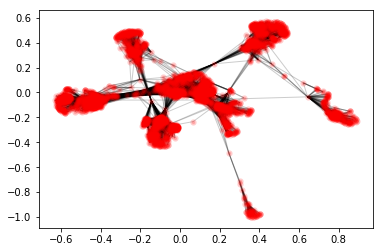

In [11]:
d = nx.degree(G_facebook)
fb_spring_layout=nx.spring_layout(G_facebook)

nx.draw_networkx(G_facebook,fb_spring_layout,
               linewidths=3,node_size=10,
               alpha=0.2,with_labels=False)
plt.savefig('fb_spring.pdf')

mean degree: 43.69101262688784
max degree: 1045
avg path length: 3.6925068496963913
avg clustering: 0.6055467186200876


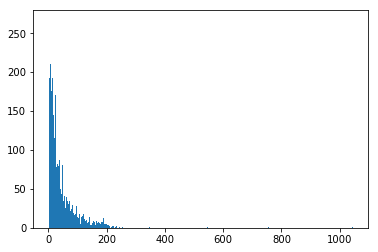

In [13]:
degree_vals = [G_facebook.degree[i] for i in G_facebook.nodes]
degree_dist = plt.hist(degree_vals,500)
plt.savefig('fb_degreedist.pdf')
print('mean degree:',numpy.mean(degree_vals))
print('max degree:',numpy.max(degree_vals))
print("avg path length:",nx.average_shortest_path_length(G_facebook))
print("avg clustering:",nx.average_clustering(G_facebook))



random graph:
mean degree: 43.69101262688784
max degree: 69
avg path length: 2.605670860668659
avg clustering: 0.010938577028377387


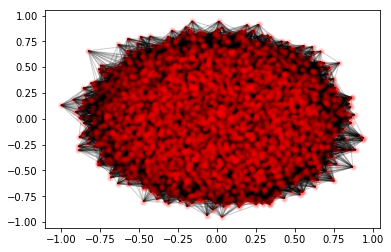

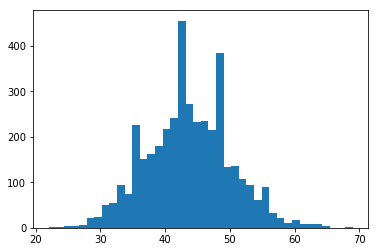

In [3]:
G_rand=mk_random_graph(G_facebook)
rand_spring_layout=nx.spring_layout(G_rand)

nx.draw_networkx(G_rand,rand_spring_layout,
               linewidths=3,node_size=10,
               alpha=0.2,with_labels=False)
plt.savefig('randgraph_spring.pdf')

plt.figure()
degree_vals_rand = [G_rand.degree[i] for i in G_rand.nodes]
degree_dist_rand = plt.hist(degree_vals_rand,40)
plt.savefig("randgraph_degreedist.pdf")

print('random graph:')
print('mean degree:',numpy.mean(degree_vals_rand))
print('max degree:',numpy.max(degree_vals_rand))
print("avg path length:",nx.average_shortest_path_length(G_rand))
print("avg clustering:",nx.average_clustering(G_rand))


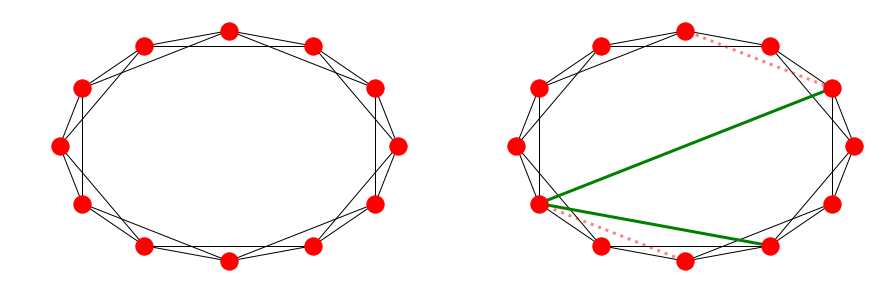

In [23]:
# Watts-Strogatz rewiring example

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))
nnodes=12
wsring=nx.watts_strogatz_graph(nnodes,4,0)
cl=nx.circular_layout(wsring)
nx.draw_networkx(wsring,pos=cl,with_labels=False,ax=ax1)
ax1.axis('off')
wsrewire=nx.watts_strogatz_graph(nnodes,4,0.025,seed=1)
nx.draw_networkx(wsrewire,pos=cl,with_labels=False,ax=ax2)
new_edges=[i for i in wsrewire.edges if not i in wsring.edges]
removed_edges=[i for i in wsring.edges if not i in wsrewire.edges]
nx.draw_networkx_edges(wsrewire,pos=cl,edgelist=new_edges,edge_color='green',width=3)
nx.draw_networkx_edges(wsring,pos=cl,edgelist=removed_edges,edge_color='red',
                       width=3,style='dotted',alpha=0.5)

ax2.axis('off')
plt.savefig('ws_rewiring_example.pdf')

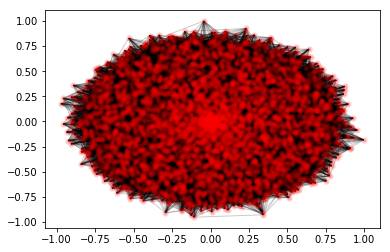

In [39]:
# preferential attachment

G_ba = nx.barabasi_albert_graph(len(G_facebook.nodes),25,seed=1)
nx.draw_networkx(G_ba,pos=nx.spring_layout(G_ba),
               linewidths=3,node_size=10,
               alpha=0.2,with_labels=False)
plt.savefig('ba_spring.pdf')

B-A graph:
mean degree: 49.69051745481555
max degree: 537


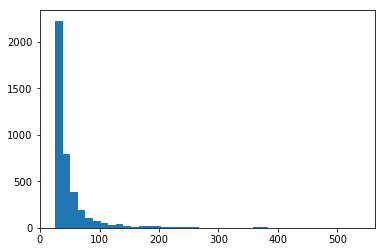

In [40]:
print('B-A graph:')
degree_vals_ba = [G_ba.degree[i] for i in G_ba.nodes]
print('mean degree:',numpy.mean(degree_vals_ba))
print('max degree:',numpy.max(degree_vals_ba))
plt.hist(degree_vals_ba,40)
plt.savefig('ba_degreedist.pdf')

In [41]:
print("avg path length:",nx.average_shortest_path_length(G_ba))
print("avg clustering:",nx.average_clustering(G_ba))


avg path length: 2.4408036993449578
avg clustering: 0.0407714957660946


In [33]:
# stochastic block model - use for visualization example

sizes=[6,6,6]
p=[[0.8,0.1,0.1],[0.1,0.8,0.1],[0.1,0.1,0.8]]
G_sbm=nx.generators.community.stochastic_block_model(sizes,p,seed=6)

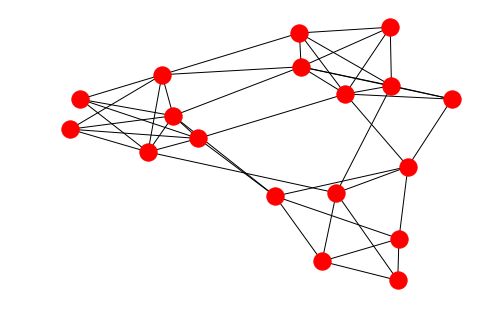

In [37]:
nx.draw_spring(G_sbm)
plt.savefig('sbm_spring.pdf')

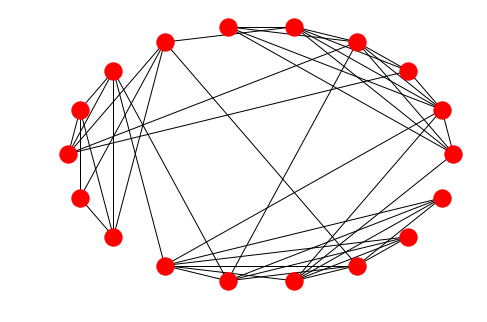

In [38]:
nx.draw_circular(G_sbm)
plt.savefig('sbm_circular.pdf')

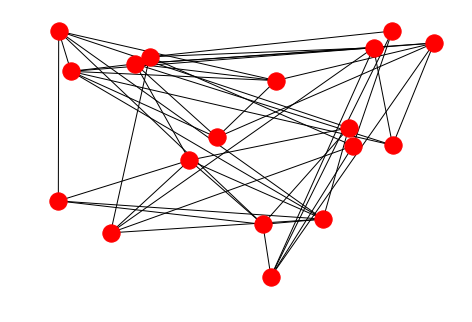

In [39]:
nx.draw_random(G_sbm)
plt.savefig('sbm_random.pdf')

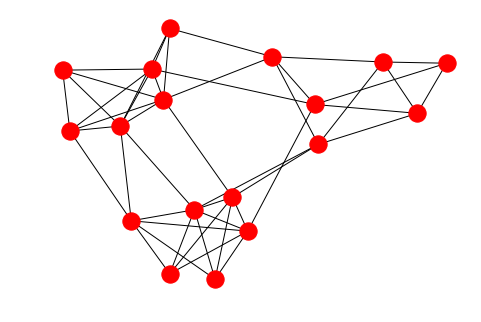

In [46]:
G_viz=nx.Graph()
edges=[(1,2),(1,3),(1,4),(5,6),(5,7),(5,8),(9,10),(9,11),(9,12),(1,5),(1,9),(5,9)]
G_viz.add_edges_from(edges)
                          

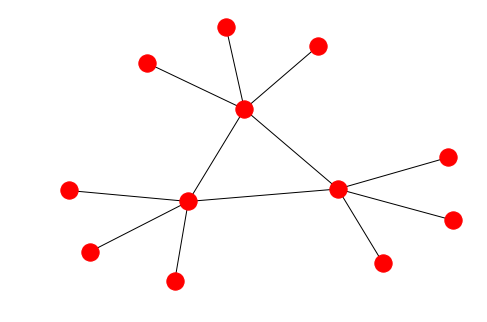

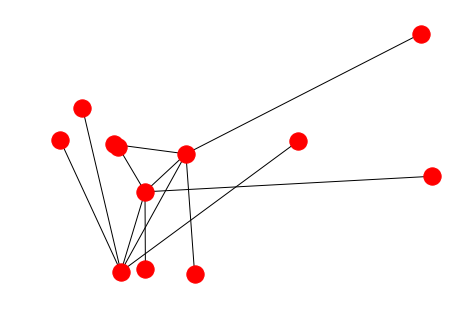

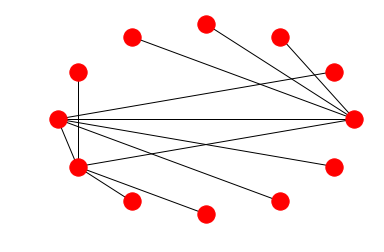

In [71]:
nx.draw_spring(G_viz,seed=1)
plt.savefig('spring_example.pdf')
plt.figure()
nx.draw_random(G_viz,seed=1)
plt.savefig('random_example.pdf')
plt.figure()
nodelst=list(G_viz.nodes)
random.shuffle(nodelst)
p=nx.circular_layout(nodelst)
nx.draw_networkx(G_viz,pos=p,with_labels=False)
plt.axis('off')
plt.savefig('circular_example.pdf')